In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

import numpy as np

In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(
    directory="C:\\Users\\cuomo\\Desktop\\prova\\train",
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(
    directory="C:\\Users\\cuomo\\Desktop\\prova\\test",
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 28086 images belonging to 5 classes.
Found 7022 images belonging to 5 classes.


In [3]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))

In [4]:
opt = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [6]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(steps_per_epoch=32,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

C:\Users\cuomo\AppData\Local\Temp\ipykernel_12036\803375665.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=32,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])


Epoch 1/100
32/32 [==============================] - 887s 28s/step - loss: 1.2972 - accuracy: 0.6667 - val_loss: 0.8235 - val_accuracy: 0.7625
Epoch 2/100
32/32 [==============================] - 878s 27s/step - loss: 0.8706 - accuracy: 0.7337 - val_loss: 0.8820 - val_accuracy: 0.7312
Epoch 3/100
32/32 [==============================] - 823s 26s/step - loss: 0.8438 - accuracy: 0.7471 - val_loss: 0.8624 - val_accuracy: 0.7344
Epoch 4/100
32/32 [==============================] - 515s 16s/step - loss: 0.8246 - accuracy: 0.7549 - val_loss: 0.8777 - val_accuracy: 0.7188
Epoch 5/100
32/32 [==============================] - 484s 15s/step - loss: 0.8260 - accuracy: 0.7568 - val_loss: 0.8204 - val_accuracy: 0.7437
Epoch 6/100
32/32 [==============================] - 473s 15s/step - loss: 0.8703 - accuracy: 0.7314 - val_loss: 0.8598 - val_accuracy: 0.7469
Epoch 7/100
32/32 [==============================] - 472s 15s/step - loss: 0.9066 - accuracy: 0.7129 - val_loss: 0.8865 - val_accuracy: 0.7188

32/32 [==============================] - 472s 15s/step - loss: 0.8785 - accuracy: 0.7305 - val_loss: 0.9428 - val_accuracy: 0.7063
Epoch 38/100
32/32 [==============================] - 469s 15s/step - loss: 0.8600 - accuracy: 0.7354 - val_loss: 0.8227 - val_accuracy: 0.7500
Epoch 39/100
32/32 [==============================] - 471s 15s/step - loss: 0.8093 - accuracy: 0.7549 - val_loss: 0.7831 - val_accuracy: 0.7437
Epoch 40/100
32/32 [==============================] - 492s 15s/step - loss: 0.8448 - accuracy: 0.7441 - val_loss: 0.8096 - val_accuracy: 0.7531
Epoch 41/100
32/32 [==============================] - 551s 17s/step - loss: 0.8667 - accuracy: 0.7383 - val_loss: 0.9134 - val_accuracy: 0.7094
Epoch 42/100
32/32 [==============================] - 550s 17s/step - loss: 0.8680 - accuracy: 0.7344 - val_loss: 0.9339 - val_accuracy: 0.6938
Epoch 43/100
32/32 [==============================] - 552s 17s/step - loss: 0.8659 - accuracy: 0.7334 - val_loss: 0.7891 - val_accuracy: 0.7750
Epoch

32/32 [==============================] - 471s 15s/step - loss: 0.8612 - accuracy: 0.7285 - val_loss: 0.8532 - val_accuracy: 0.7344
Epoch 74/100
32/32 [==============================] - 469s 15s/step - loss: 0.9128 - accuracy: 0.7178 - val_loss: 0.8870 - val_accuracy: 0.7219
Epoch 75/100
32/32 [==============================] - 471s 15s/step - loss: 0.9020 - accuracy: 0.7266 - val_loss: 0.8534 - val_accuracy: 0.7156
Epoch 76/100
32/32 [==============================] - 470s 15s/step - loss: 0.9472 - accuracy: 0.7002 - val_loss: 0.9600 - val_accuracy: 0.6969
Epoch 77/100
32/32 [==============================] - 468s 15s/step - loss: 0.9212 - accuracy: 0.7080 - val_loss: 0.9025 - val_accuracy: 0.7156
Epoch 78/100
32/32 [==============================] - 471s 15s/step - loss: 0.8552 - accuracy: 0.7373 - val_loss: 0.7978 - val_accuracy: 0.7375
Epoch 79/100
32/32 [==============================] - 469s 15s/step - loss: 0.8072 - accuracy: 0.7656 - val_loss: 0.8067 - val_accuracy: 0.7594
Epoch

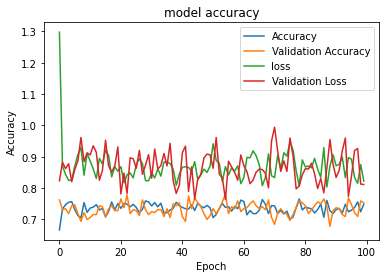

In [9]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [15]:
model.save('C:\\Users\\cuomo\\Desktop\\MachineLearningProjects\\Diabetic-Retinopathy-Debrecen\\vgg16\\model_immagini_senza_elaborazioni')

INFO:tensorflow:Assets written to: C:\Users\cuomo\Desktop\MachineLearningProjects\Diabetic-Retinopathy-Debrecen\vgg16\model\assets


INFO:tensorflow:Assets written to: C:\Users\cuomo\Desktop\MachineLearningProjects\Diabetic-Retinopathy-Debrecen\vgg16\model\assets
